# Лабораторная работа 2

датасет 1 https://www.kaggle.com/datasets/lava18/google-play-store-apps

датасет 2 https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

датасет 3 https://www.kaggle.com/datasets/muthuj7/weather-dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

In [ ]:
data = pd.read_csv(r'C:\Users\ksarb\Documents\MMO_2024\Datasets\googleplaystore.csv', sep=",")

In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data.shape

(10841, 13)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Пропуски в данных в столбцах type, content_rating и ver (оба) можно обработать удалением - это единичные значения.

In [ ]:
colsForDel = ['Type', 'Content Rating', 'Current Ver', 'Android Ver']
data_drop_na = data[colsForDel].dropna()
data_drop_na.shape


(10829, 4)

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

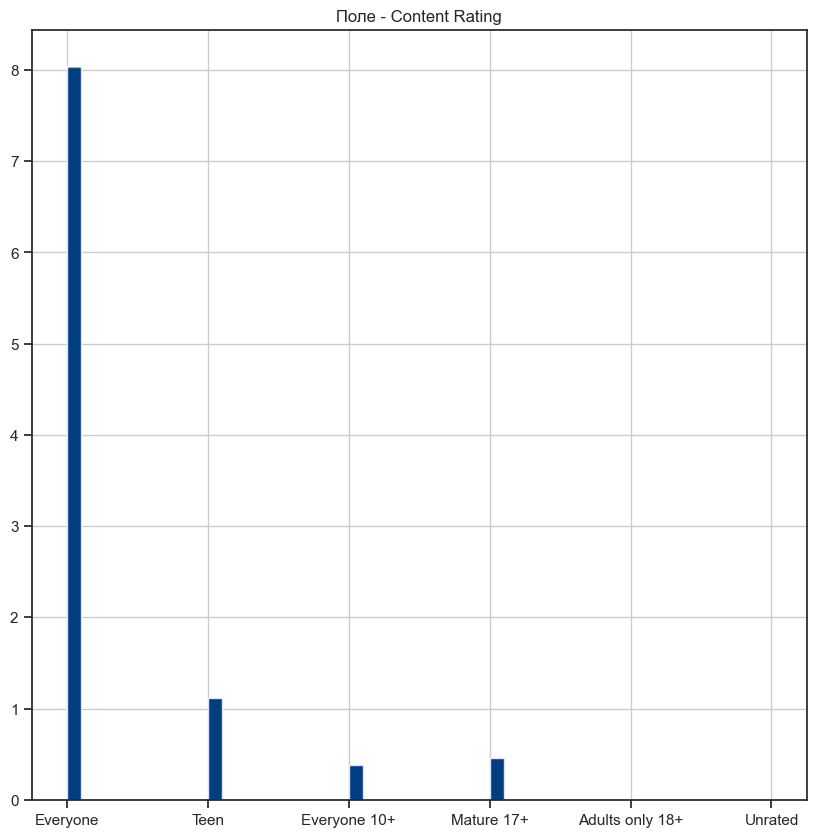

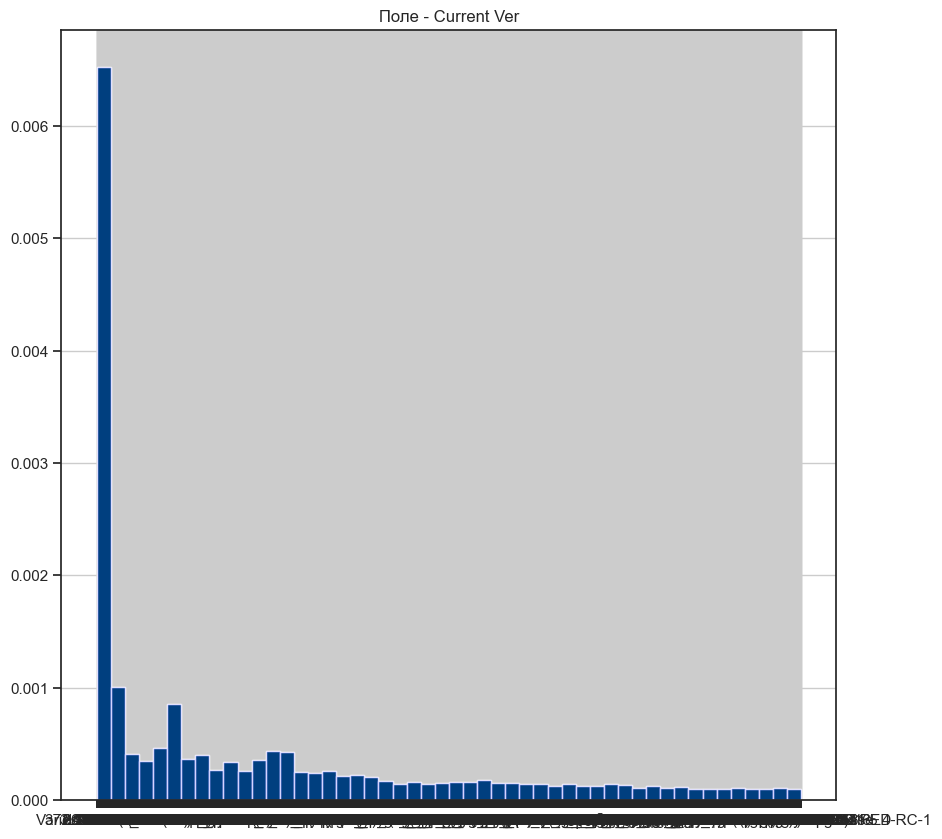

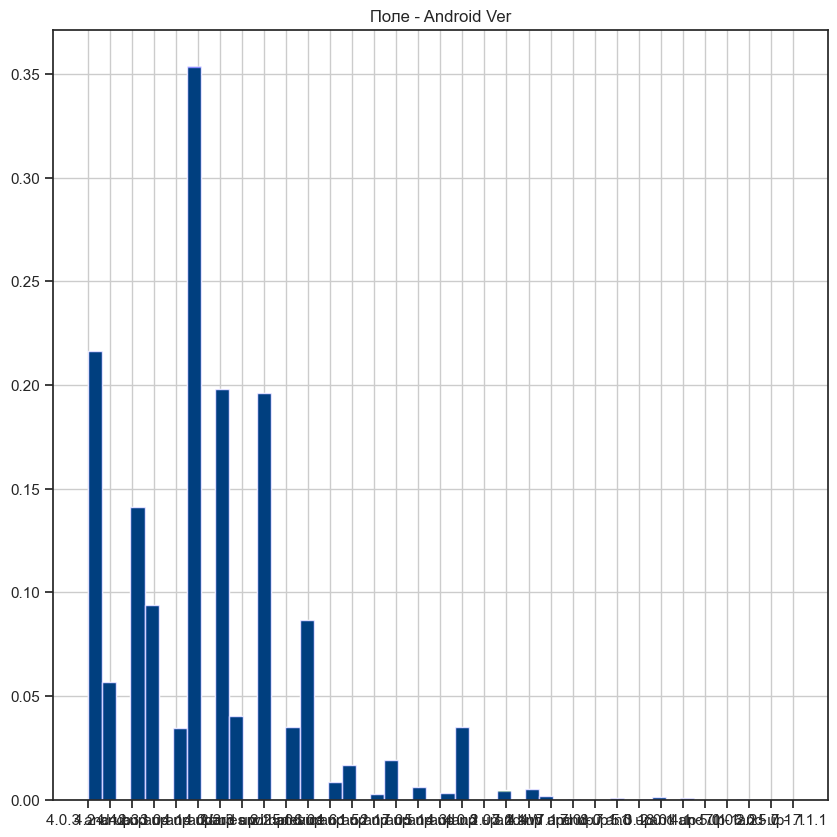

In [ ]:
plot_hist_diff(data, data_drop_na, ['Content Rating', 'Current Ver', 'Android Ver'])

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
data = data.dropna(subset=colsForDel)
data.shape

(10829, 13)

In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

C:\Users\ksarb\AppData\Local\Temp\ipykernel_3944\195523562.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

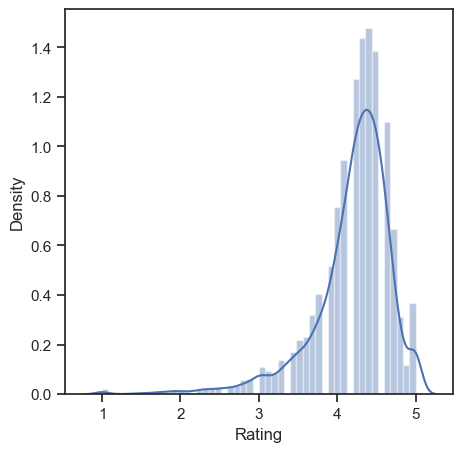

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(data['Rating'])

Заполним rating

In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

In [ ]:
filled_data, _, _ = impute_column(data, 'Rating', 'median')

C:\Users\ksarb\AppData\Local\Temp\ipykernel_3944\2113822577.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filled_data)


<Axes: ylabel='Density'>

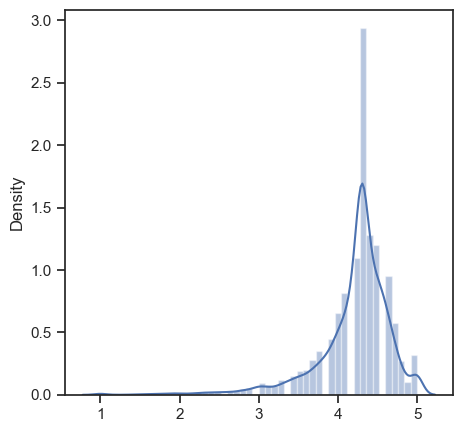

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(filled_data)

In [ ]:
filled_data

array([4.1, 3.9, 4.7, ..., 4.3, 4.5, 4.5])

In [ ]:
knnimpute_hdata = data[['Reviews', 'Rating']].copy()
knnimpute_hdata.head()
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    add_indicator=False,
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(knnimpute_hdata)
knnimpute_hdata_imputed = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=knnimpute_hdata.columns)
knnimpute_hdata_imputed.head()

,Reviews,Rating
0,159.0,4.1
1,967.0,3.9
2,87510.0,4.7
3,215644.0,4.5
4,967.0,4.3


C:\Users\ksarb\AppData\Local\Temp\ipykernel_3944\274606484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(knnimpute_hdata['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

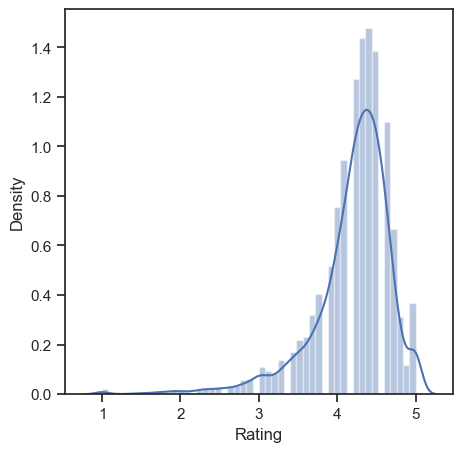

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(knnimpute_hdata['Rating'])

С помощью импьютации сохранили форму распределения, не создав пиков.

## кодирование признаков
### категориальные

In [ ]:
data1 = pd.read_csv(r'C:\Users\ksarb\Documents\MMO_2024\Datasets\Life.csv', sep=",")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
data1['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
cat_enc_le = le.fit_transform(data1['Country'])

In [ ]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
le.inverse_transform([0, 1, 2, 3])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola'], dtype=object)

In [ ]:
pd.get_dummies(data1[['Country']]).head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### числовые

In [ ]:
data2 = pd.read_csv(r'C:\Users\ksarb\Documents\MMO_2024\Datasets\weatherHistory.csv', sep=",")
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
data2.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

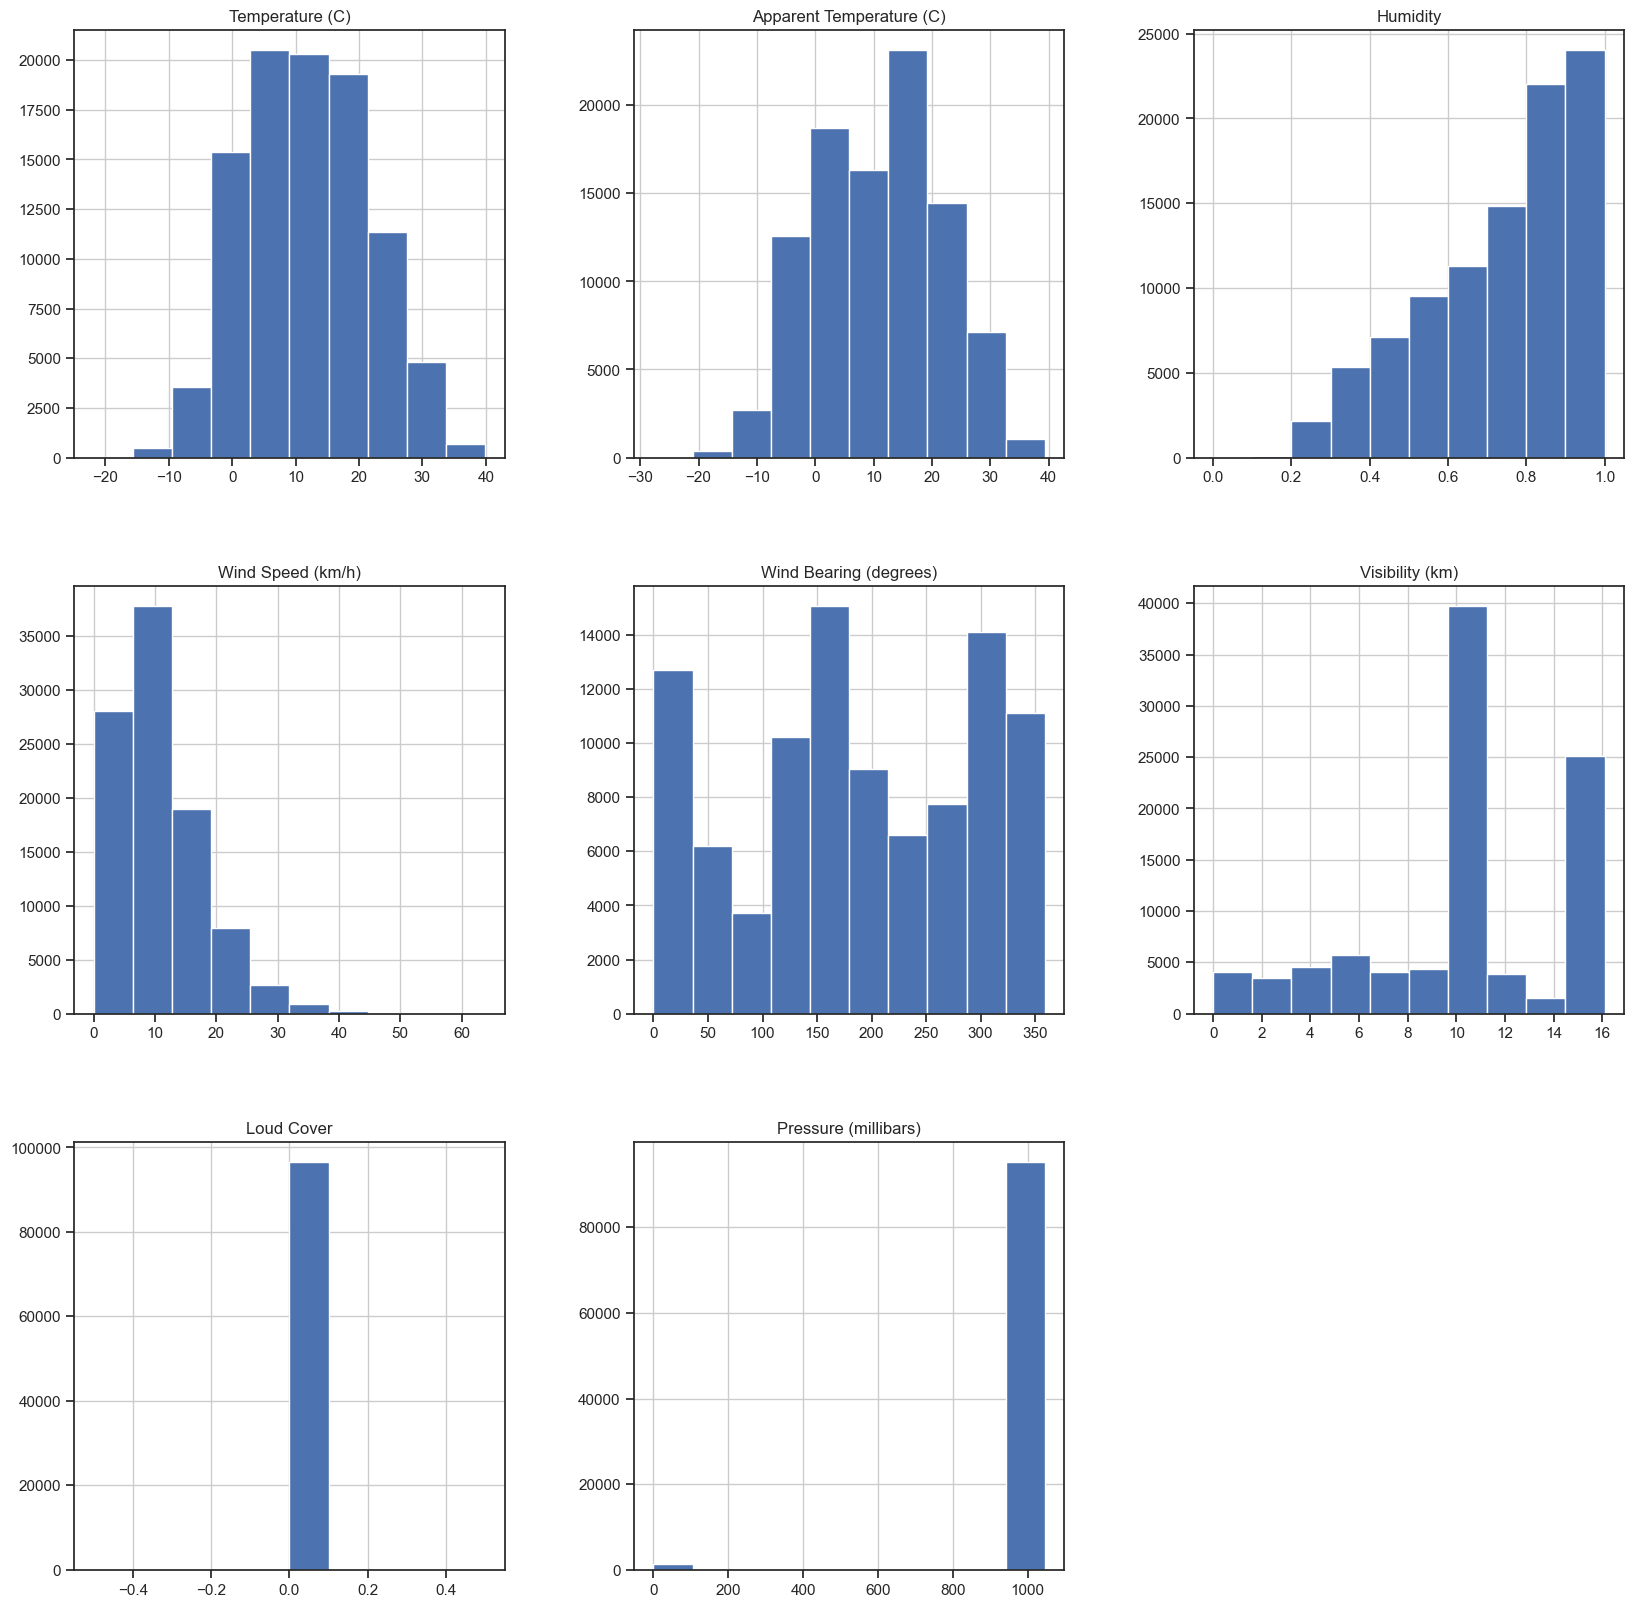

In [ ]:
data2.hist(figsize=(20,20))
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(data2[['Apparent Temperature (C)']])
# формируем DataFrame на основе массива
data_scaled =pd.DataFrame(data_cs31_scaled_temp, columns=['Apparent Temperature (C)'])
data_scaled.describe()

,Apparent Temperature (C)
count,96453.000000
mean,0.575172
std,0.159509
min,0.000000
25%,0.447767
50%,0.592246
75%,0.694226
max,1.000000


In [ ]:
data_scaled.loc[data_scaled['Apparent Temperature (C)']==0]

,Apparent Temperature (C)
54864,0.0


In [ ]:
data_scaled = data_scaled.loc[data_scaled['Apparent Temperature (C)']!=0]

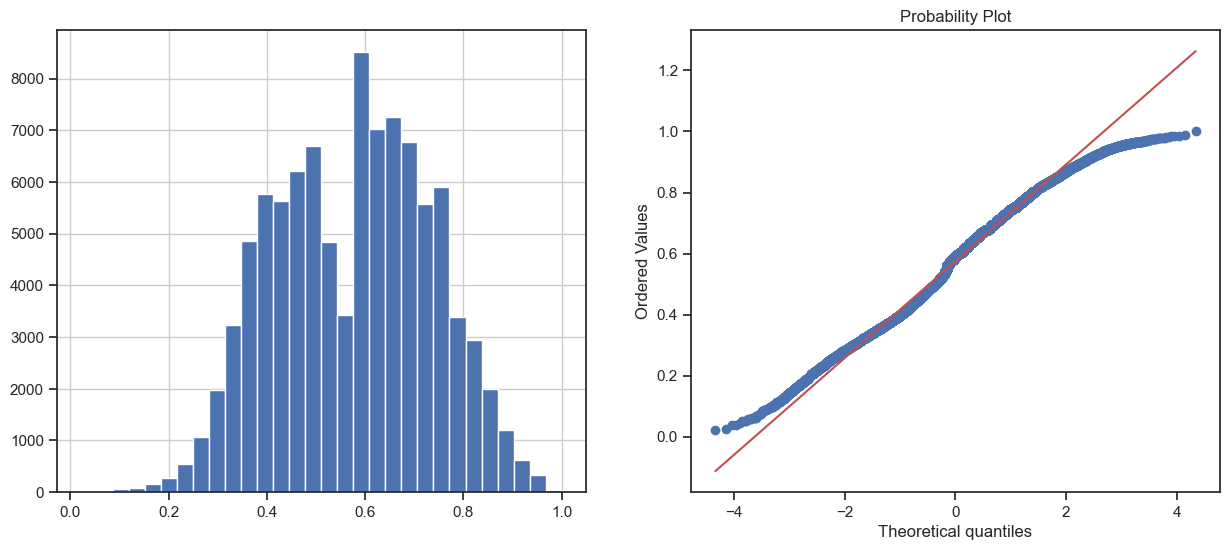

In [ ]:
diagnostic_plots(data_scaled, 'Apparent Temperature (C)')

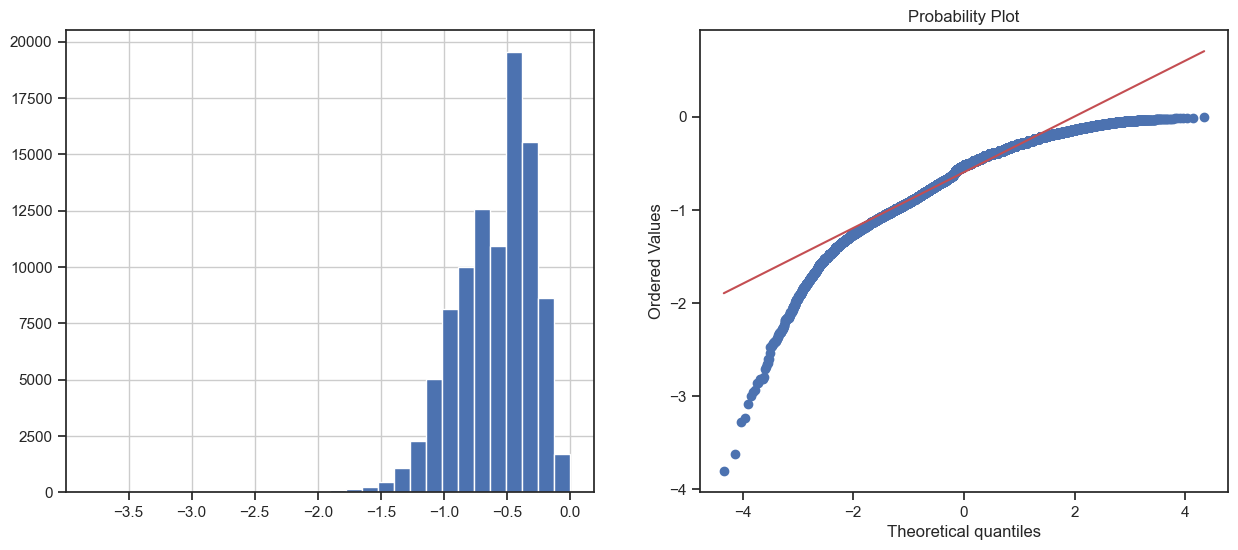

In [ ]:
# логарифмическое
data_scaled['norm_log'] = np.log(data_scaled['Apparent Temperature (C)'])
diagnostic_plots(data_scaled, 'norm_log')

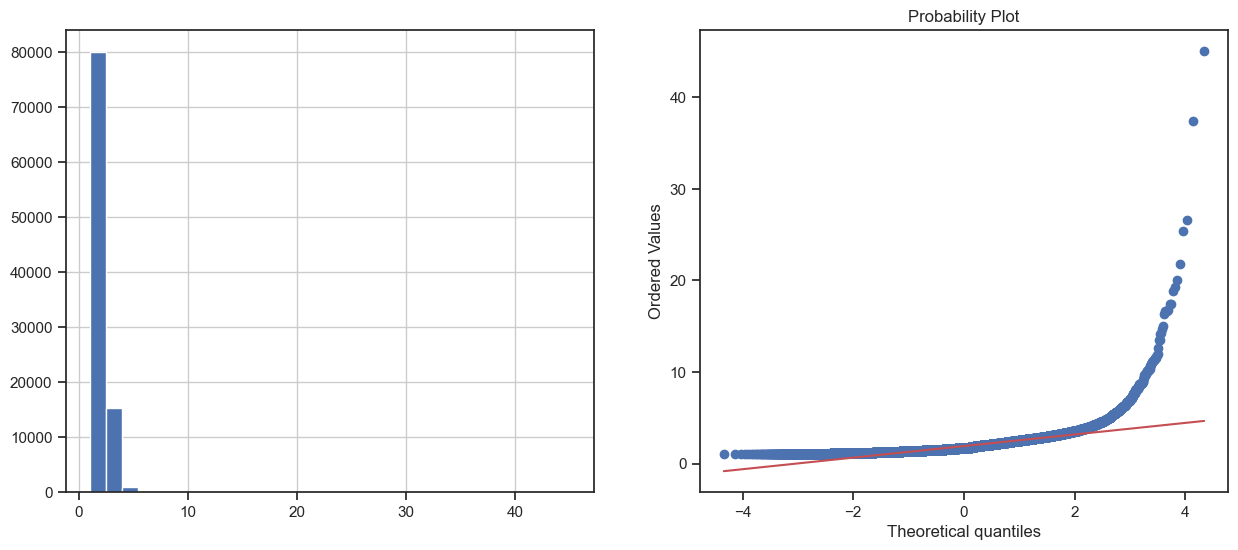

In [ ]:
# обратное
data_scaled['norm_reciprocal'] = 1 / (data_scaled['Apparent Temperature (C)'])
diagnostic_plots(data_scaled, 'norm_reciprocal')

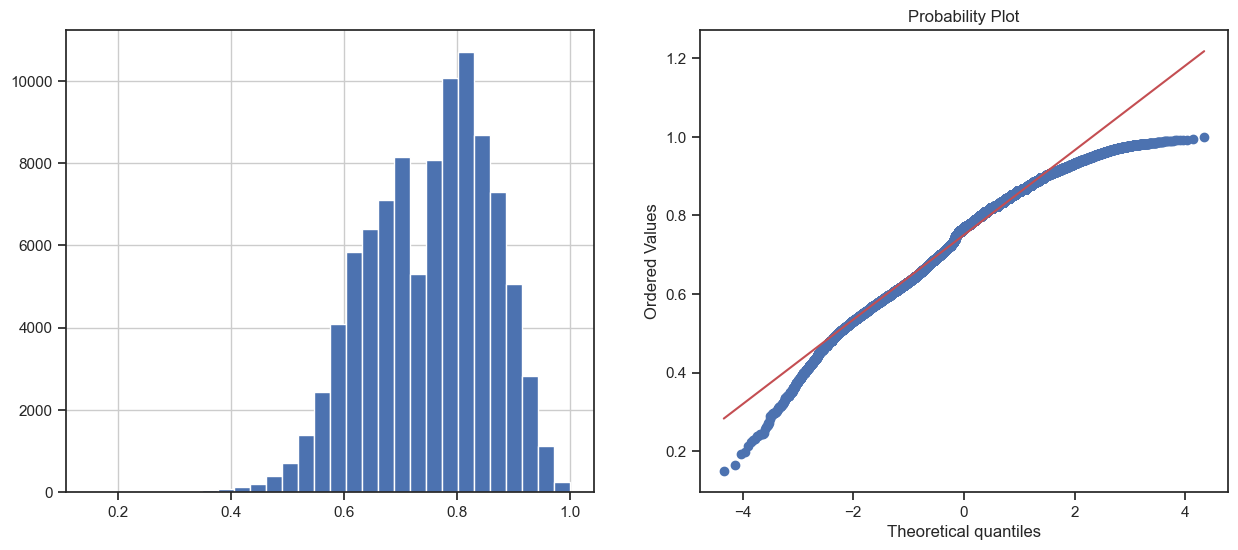

In [ ]:
# root
data_scaled['norm_sqr'] = data_scaled['Apparent Temperature (C)']**(1/2)
diagnostic_plots(data_scaled, 'norm_sqr')

Оптимальное значение λ = 0.9778834045020082


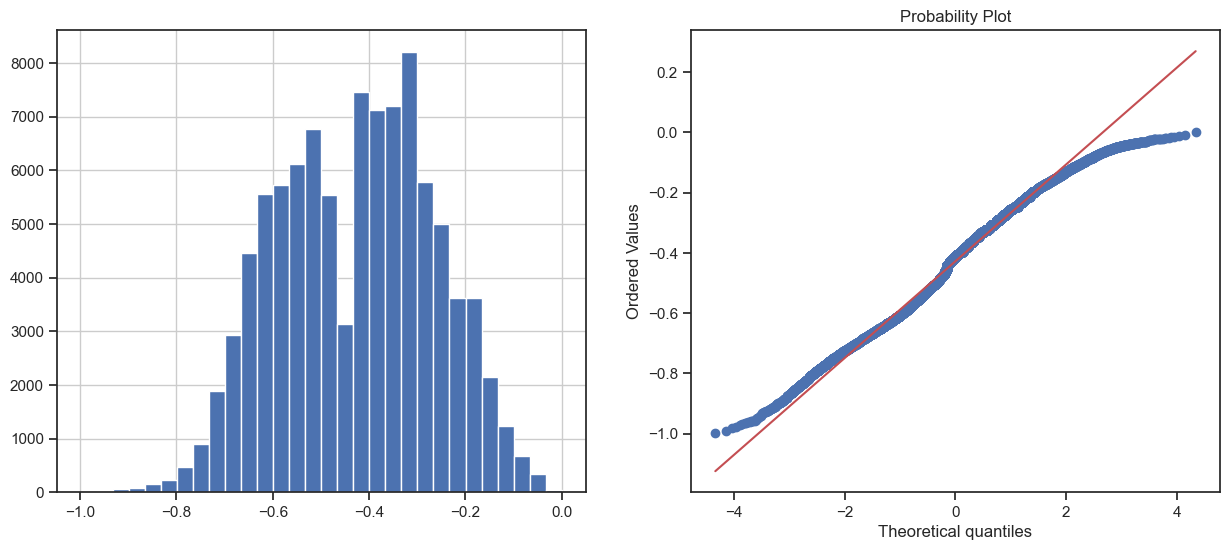

In [ ]:
# Бокса-Кокса
data_scaled['norm_boxcox'], param = stats.boxcox(data_scaled['Apparent Temperature (C)'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_scaled, 'norm_boxcox')

Оптимальное значение λ = 1.1461032413095196


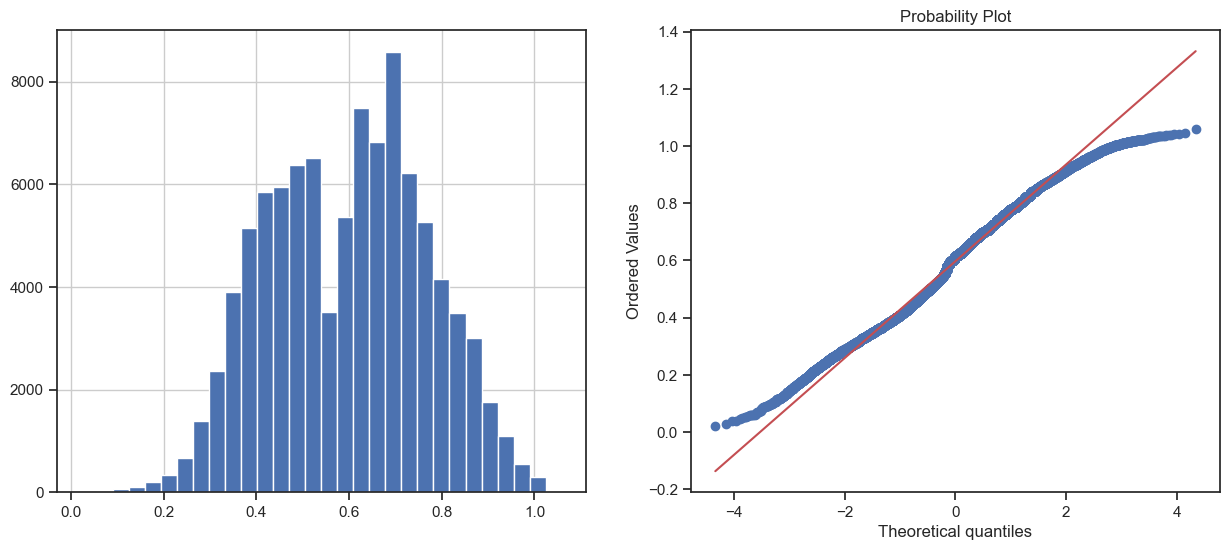

In [ ]:
# Преобразование Йео-Джонсона
data_scaled['norm_yeojohnson'], param = stats.yeojohnson(data_scaled['Apparent Temperature (C)'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data_scaled, 'norm_yeojohnson')